# Task 2

---

## Predictive modeling of customer bookings

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style = 'ticks', palette = 'pastel')

In [134]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [136]:
# Converting cat type into numerical type
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

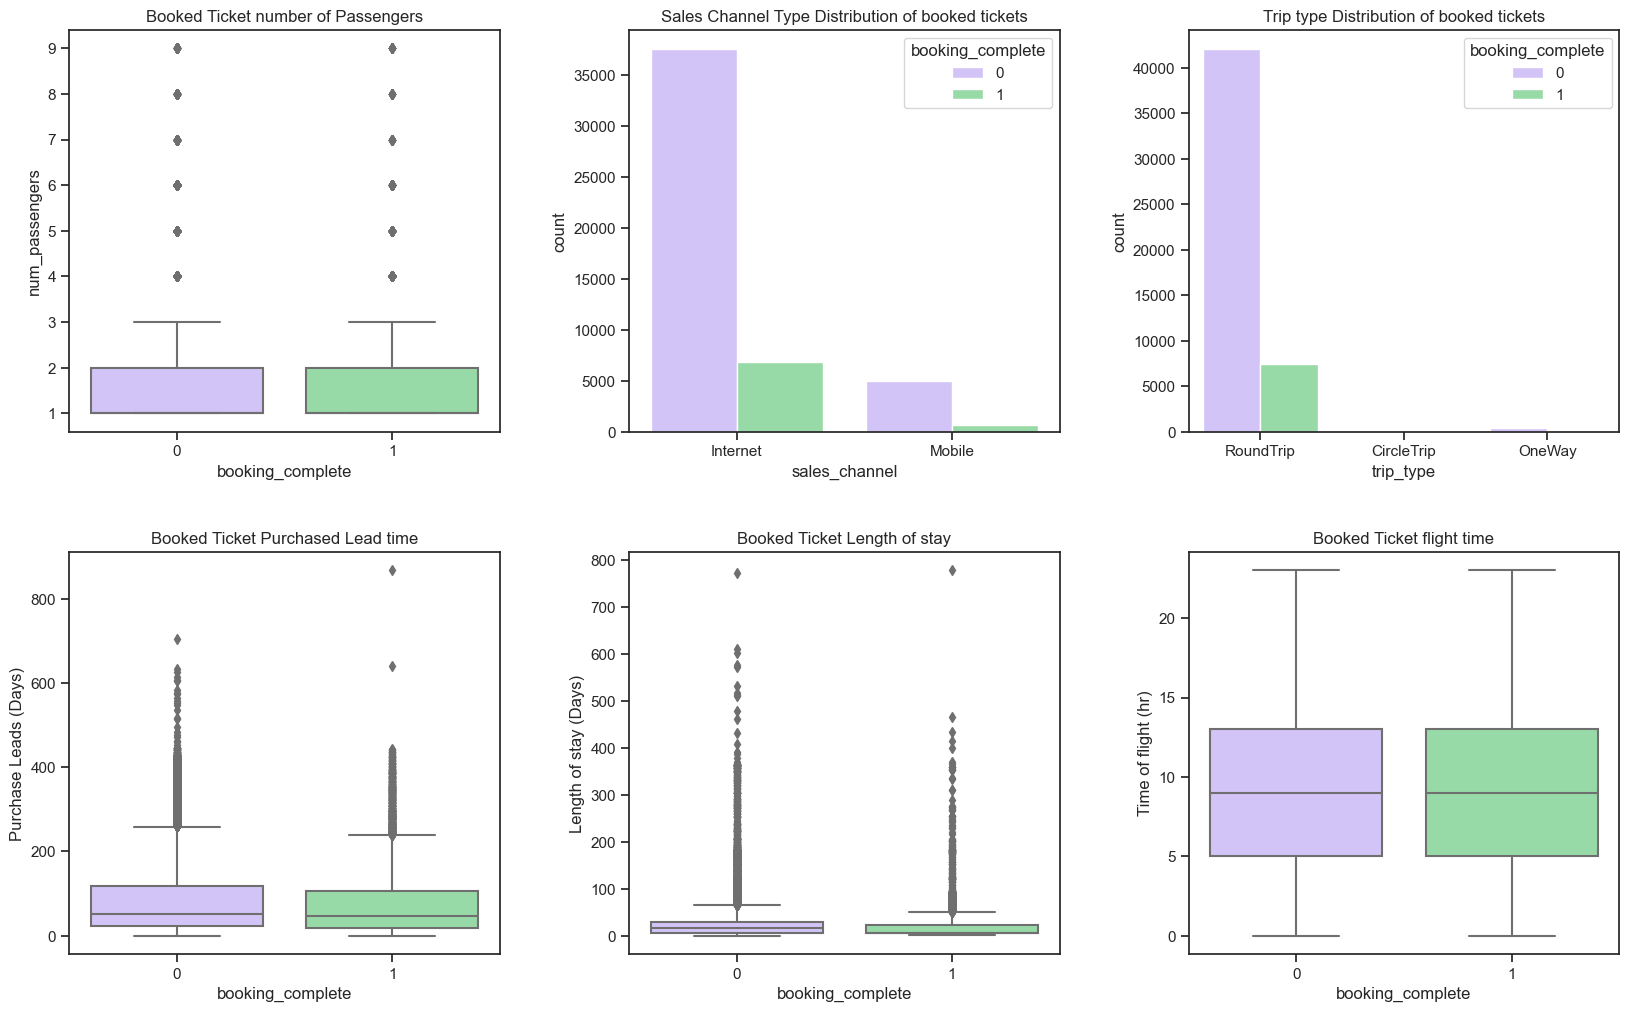

In [137]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (20,12))
sns.boxplot(x = 'booking_complete', y = 'num_passengers', data = df, ax = ax[0,0] , palette = ['m','g'])
ax[0,0].set(title = 'Booked Ticket number of Passengers')
sns.countplot(x = 'sales_channel', hue = 'booking_complete', data = df, ax = ax[0,1] , palette = ['m','g'])
ax[0,1].set(title = 'Sales Channel Type Distribution of booked tickets')
sns.countplot(x = 'trip_type', hue = 'booking_complete', data = df, ax = ax[0,2] , palette = ['m','g'])
ax[0,2].set(title = 'Trip type Distribution of booked tickets')
sns.boxplot(x = 'booking_complete', y = 'purchase_lead', data = df, ax = ax[1,0] , palette = ['m','g'])
ax[1,0].set(title = 'Booked Ticket Purchased Lead time', ylabel = 'Purchase Leads (Days)')
sns.boxplot(x = 'booking_complete', y = 'length_of_stay', data = df, ax = ax[1,1] , palette = ['m','g'])
ax[1,1].set(title = 'Booked Ticket Length of stay', ylabel = 'Length of stay (Days)')
sns.boxplot(x = 'booking_complete', y = 'flight_hour', data = df, ax = ax[1,2] , palette = ['m','g'])
ax[1,2].set(title = 'Booked Ticket flight time', ylabel = 'Time of flight (hr)')
fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()



Insights:
- Large portion of successfully booked tickets came from the "internet" sales channel.
- All successfully booked tickets are roundtrip
- The booked flight time schedule is selected mostly between 5 to 15th hour of the day


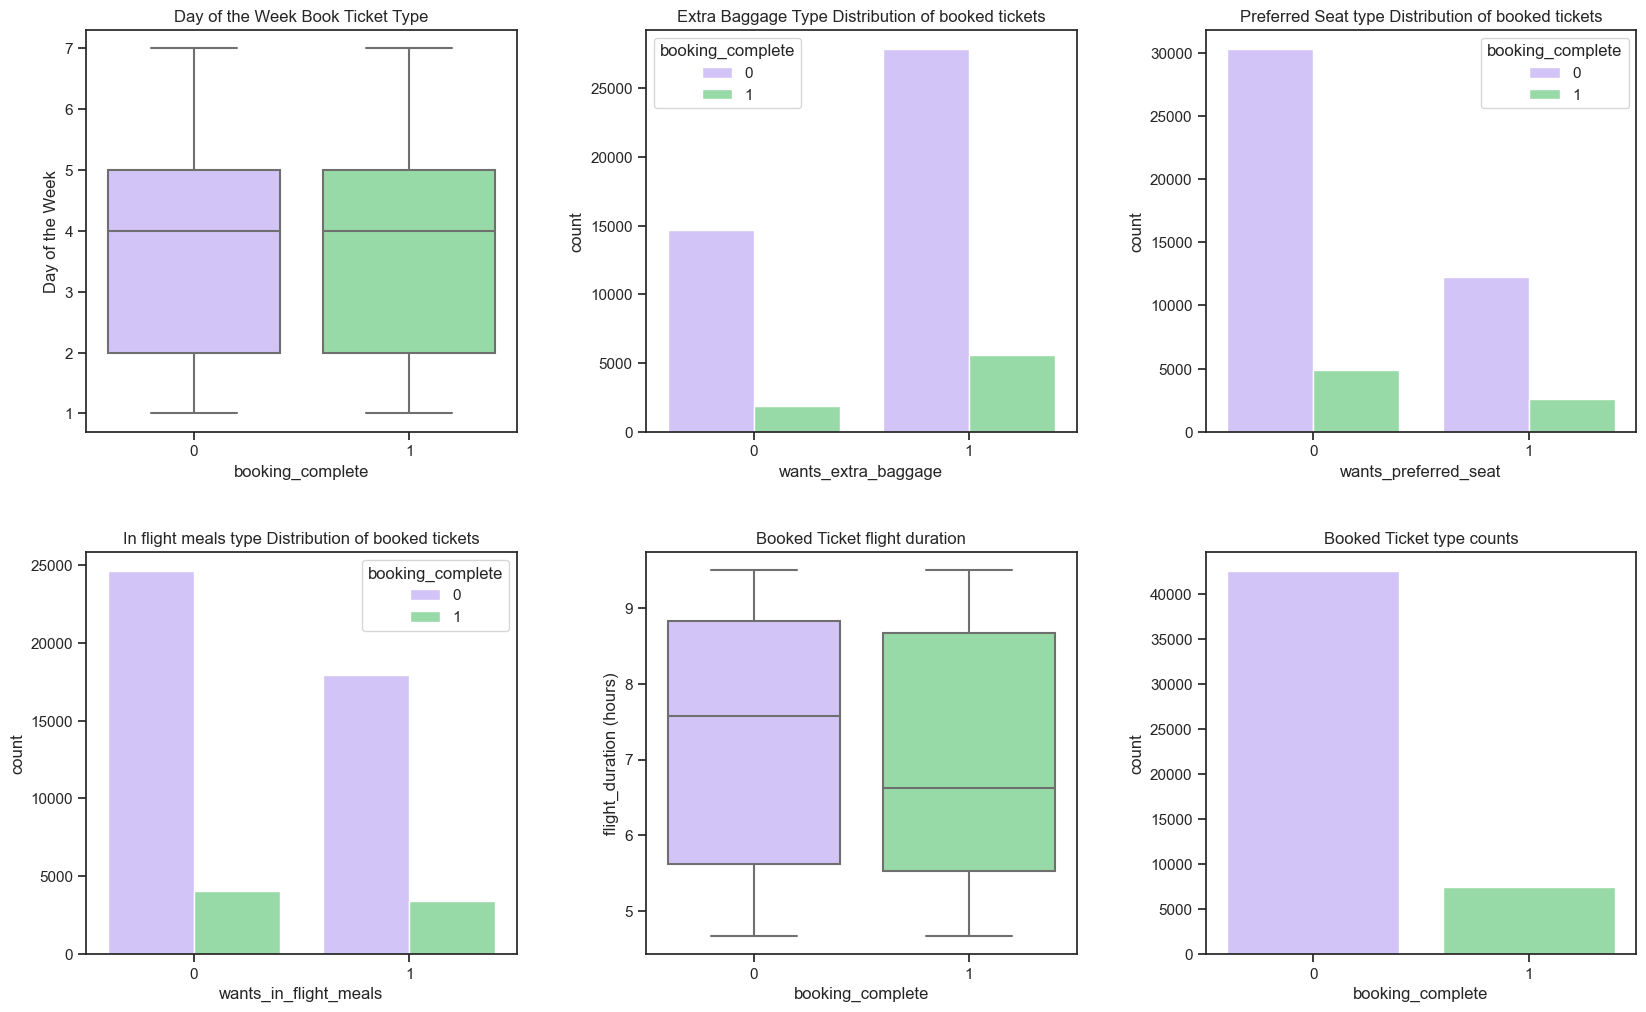

In [138]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (20,12))
sns.boxplot(x = 'booking_complete', y = 'flight_day', data = df, ax = ax[0,0] , palette = ['m','g'])
ax[0,0].set(title = 'Day of the Week Book Ticket Type', ylabel = 'Day of the Week')
sns.countplot(x = 'wants_extra_baggage', hue = 'booking_complete', data = df, ax = ax[0,1] , palette = ['m','g'])
ax[0,1].set(title = 'Extra Baggage Type Distribution of booked tickets')
sns.countplot(x = 'wants_preferred_seat', hue = 'booking_complete', data = df, ax = ax[0,2] , palette = ['m','g'])
ax[0,2].set(title = 'Preferred Seat type Distribution of booked tickets')
sns.countplot(x = 'wants_in_flight_meals', hue = 'booking_complete', data = df, ax = ax[1,0] , palette = ['m','g'])
ax[1,0].set(title = 'In flight meals type Distribution of booked tickets')
sns.boxplot(x = 'booking_complete', y = 'flight_duration', data = df, ax = ax[1,1] , palette = ['m','g'])
ax[1,1].set(title = 'Booked Ticket flight duration', ylabel = 'flight_duration (hours)')
sns.countplot(x = 'booking_complete', data = df, ax = ax[1,2] , palette = ['m','g'])
ax[1,2].set(title = 'Booked Ticket type counts')
fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()


Insights:
- The median of the day of flight book is during the 4th day of the week.
- Large portion of booked customers wants extra baggage
- Flight meals do have minimal difference in terms of distribution for booked customers
- Lower flight duration median for booked customers. 

In [139]:
# For Route & Origin distribution
grp_route = ((df[['route','booking_complete']]
              .groupby(['route','booking_complete']).size()
              .reset_index(name = 'counts'))
              .sort_values(by = ['booking_complete','counts'], ascending = [True, False])
            )
grp_origin = (df[['booking_origin','booking_complete']]
              .groupby(['booking_origin','booking_complete']).size()
              .reset_index(name = 'counts')
              .sort_values(by = ['booking_complete', 'counts'], ascending = [True, False])
            )
print("Top Ten Routes for booked and non-booked flight")
display(grp_route[grp_route['booking_complete'] == 0].head(10))
display(grp_route[grp_route['booking_complete'] == 1].head(10))
print("================================================")
print("Top Ten Booking Origin for booked and non-booked flight")
display(grp_origin[grp_origin['booking_complete'] == 0].head(10))
display(grp_origin[grp_origin['booking_complete'] == 1].head(10))


Top Ten Routes for booked and non-booked flight


,route,booking_complete,counts
6,AKLKUL,0,2113
1053,MELSGN,0,799
730,ICNSIN,0,711
734,ICNSYD,0,690
477,DMKPER,0,642
1063,MELTPE,0,630
473,DMKOOL,0,615
491,DPSICN,0,609
465,DMKKIX,0,557
1288,SGNSYD,0,552


,route,booking_complete,counts
7,AKLKUL,1,567
1195,PENTPE,1,401
466,DMKKIX,1,187
774,JHBKTM,1,164
1041,MELPEN,1,137
719,ICNPEN,1,135
958,KTMPEN,1,118
167,CGKHND,1,105
663,HNDPEN,1,98
174,CGKKIX,1,96


Top Ten Booking Origin for booked and non-booked flight


,booking_origin,booking_complete,counts
5,Australia,0,16972
76,Malaysia,0,4706
127,South Korea,0,4097
62,Japan,0,3407
26,China,0,2693
138,Taiwan,0,1853
54,Indonesia,0,1754
141,Thailand,0,1560
52,India,0,1139
92,New Zealand,0,1020


,booking_origin,booking_complete,counts
77,Malaysia,1,2468
6,Australia,1,900
27,China,1,694
55,Indonesia,1,615
63,Japan,1,478
142,Thailand,1,470
128,South Korea,1,462
122,Singapore,1,299
139,Taiwan,1,224
53,India,1,131


Insights:
- A large portion of not completed bookings came from Australia which is almost 70%, to be followed by Malaysia and south korea ranging near 4000 users.
- A large portion of completed booked flights came from Malaysia. 
- Needs to understand why these countries have many booking incomplete attempts, what are the causes?

### Feature Engineering
Since 'route' & 'booking_origin' contains a lot of unique values (~700 & 104), we will be hash the data by using sklearn's FeatureHasher.

In [141]:
from sklearn.feature_extraction import FeatureHasher 

hasher = FeatureHasher(n_features=8, input_type='string')
route_1d = np.array(df['route']).reshape(-1,1)
hashed_route = hasher.transform(route_1d).toarray()

hashed_df_rh = pd.DataFrame(hashed_route)
hashed_df_rh.columns = ['rh_1','rh_2','rh_3','rh_4','rh_5','rh_6','rh_7','rh_8']
hashed_df_rh.head()


,rh_1,rh_2,rh_3,rh_4,rh_5,rh_6,rh_7,rh_8
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [142]:
hasher = FeatureHasher(n_features=5, input_type='string')
origin_1d = np.array(df['booking_origin']).reshape(-1,1)
hashed_origin = hasher.transform(origin_1d).toarray()

hashed_df_bh = pd.DataFrame(hashed_origin)
hashed_df_bh.columns = ['bh_1','bh_2','bh_3','bh_4','bh_5']
hashed_df_bh.head()

,bh_1,bh_2,bh_3,bh_4,bh_5
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,-1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,-1.0,0.0,0.0


In [157]:
# Get Dummies the categorical variable first and then combined it. 
final_df = pd.concat([df,hashed_df_rh,hashed_df_bh], axis = 1)
final_df = final_df.loc[:, ~final_df.columns.isin(['booking_origin','route'])]

final_df = pd.get_dummies(final_df, dtype=int)
final_df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,bh_1,bh_2,bh_3,bh_4,bh_5,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,1,0,0,5.52,0,...,0.0,0.0,1.0,0.0,0.0,1,0,0,0,1
1,1,112,20,3,6,0,0,0,5.52,0,...,0.0,0.0,1.0,0.0,0.0,1,0,0,0,1
2,2,243,22,17,3,1,1,0,5.52,0,...,0.0,0.0,-1.0,0.0,0.0,1,0,0,0,1
3,1,96,31,4,6,0,0,1,5.52,0,...,0.0,0.0,1.0,0.0,0.0,1,0,0,0,1
4,2,68,22,15,3,1,0,1,5.52,0,...,0.0,0.0,-1.0,0.0,0.0,1,0,0,0,1


## Modeling 
### Gradient Boosting Trees Classifier

---

Info: <br>
By having individual decision tress intrinsically perform feature selection, the information can be used to measure the importance of each feature.

In [172]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

X = final_df.drop('booking_complete', axis=1).values
y = final_df['booking_complete'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=77)

Determining the best paramaters

In [175]:
np.random.seed(77)
grid = {
    'n_estimators': [60,95,150,200],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [0.15, 0.3],
    'max_depth': [5,8,15,20],
    'learning_rate': [0.01, 0.1, 0.5]
}

gbc = GradientBoostingClassifier()
gbc_gridSearch = GridSearchCV(estimator=gbc, param_grid = grid, cv = 5)
gbc_gridSearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [5, 8, 15, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [0.15, 0.3],
                         'n_estimators': [60, 95, 150, 200]})

In [178]:
# Best Parameters
display(gbc_gridSearch.best_params_)

{'learning_rate': 0.5,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 0.15,
 'n_estimators': 200}

In [216]:
display(gbc_gridSearch.best_score_)

0.8512000000000001

Fitting the best params model

In [182]:
fmodel = GradientBoostingClassifier(learning_rate=0.5, max_depth= 20, max_features='sqrt', n_estimators=200, random_state= 77)
fmodel.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=20, max_features='sqrt',
                           n_estimators=200, random_state=77)

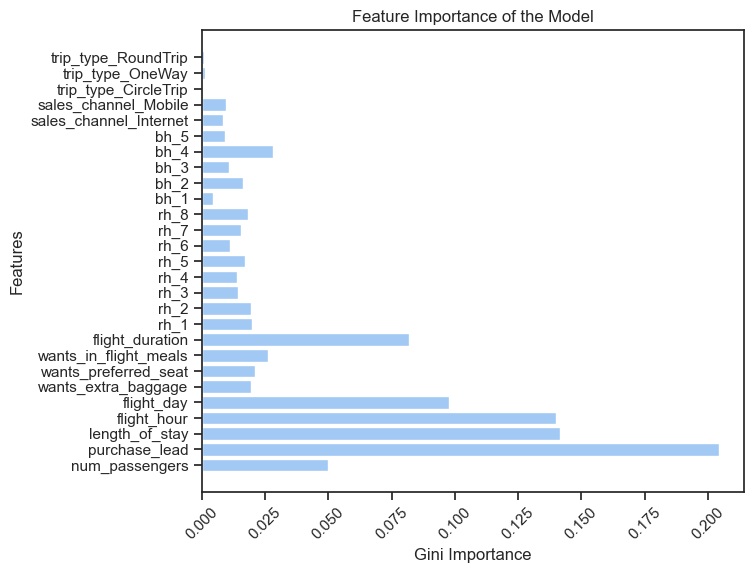

In [214]:
fig, ax = plt.subplots(figsize = (7,6))
plt.barh( list(final_df.loc[:,final_df.columns != 'booking_complete'].columns), fmodel.feature_importances_)
plt.xticks(rotation = 45)
ax.set(title = 'Feature Importance of the Model', ylabel = 'Features', xlabel = 'Gini Importance')
plt.show()



### Conclusion
---
Getting a cross-validated(k=5) score 0.85 accuracy using optimized Gradient Boosted Trees. <br>
Some hashed features do have some close feature importance score to original categorical features such as flags of in flights meals, preferred seat & option of baggage. <br>
The top feature that contributes the most is the lead time (days diff of travel date and booked date) which do makes sense in terms of purchasing a flight ticket. <br>
Other top features that have high scores are weekday schedule & hour schedule of the flight, and travel length of stay (days).

In our study, stakeholders want to know what features makes a customer booked a flight and these insights can be useful for them in building a model which can predict their target variable/feature


 <i>Note: This study can be extended in exploring other models relates to classification and further check features </i>